# Advanced Lane Detection (using Deep Learning)
---
## Testing saved Neural Network model -
The purpose of this notebook is to use the Neural Network model saved by the train_cnn.ipynb(./train_cnn.ipynb) notebook and test it on test images to validate the accuracy of our model.


#### Import TensorFlow and Keras libraries

We will start by importing all the necessary libraries for Keras and TensorFlow. Apart from these libraries, we will also import some other libraries such as NumPy, Glob, cv2, csv, and MatPlotLib.

In [1]:
import pickle

import cv2
import numpy as np

import tensorflow as tf
import keras

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from scipy import ndimage

from keras.models import Model, Sequential
from keras.models import load_model

##### PRINT VERSIONS FOR MATPLOTLIB, KERAS, TENSORFLOW and OPENCV

# print versions for tensorflow and Keras
print("Tensorflow version - ", tf.__version__)
print("Keras version - ", keras.__version__)
print("OpenCV version - ", cv2.__version__)
print()


Tensorflow version -  2.4.1
Keras version -  2.4.3
OpenCV version -  3.4.2



## Pre-process the image
Here, we will pre-process the image through the thresholding functions.

### Perspective transforms

We will pass the images through the perspective transforms and get a perspective transformed image which will then be passed to the neural network. Here, we will define a function called pre_processing which takes in original camera image and produces a perspective transformed image.

In [2]:
# Pre-process the images

# function for applying perspective view on the images
def perspective_view(img):

    img_size = (img.shape[1], img.shape[0])

    # image points extracted from image approximately
    bottom_left = [480, 960]
    bottom_right = [1445, 960]
    top_left = [900, 710]
    top_right = [1024, 710]
    

    src = np.float32([bottom_left, bottom_right, top_right, top_left])

    pts = np.array([bottom_left, bottom_right, top_right, top_left], np.int32)
    pts = pts.reshape((-1, 1, 2))
    # create a copy of original img
    imgpts = img.copy()
    cv2.polylines(imgpts, [pts], True, (255, 0, 0), thickness = 3)

    # choose four points in warped image so that the lines should appear as parallel
    bottom_left_dst = [600, 1080]
    bottom_right_dst = [1300, 1080]
    top_left_dst = [600, 1]
    top_right_dst = [1300, 1]

    dst = np.float32([bottom_left_dst, bottom_right_dst, top_right_dst, top_left_dst])

    # apply perspective transform
    M = cv2.getPerspectiveTransform(src, dst)

    # compute inverse perspective transform
    Minv = cv2.getPerspectiveTransform(dst, src)

    # warp the image using perspective transform M
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

    return warped, M, Minv

### Load Pickle Data

We will load the saved pickle data from [camera_calculations.ipynb](./camera_calculations.ipynb) file.

In [3]:
file = open('pickle/dist_pickle.p', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()

mtx, dst = data.values()

### Load an image 


Following images show the original and perspective transformed images...
Shape of the input image =  (1080, 1920, 3)
Shape of the resized image =  (270, 480, 3)


<Figure size 432x288 with 0 Axes>

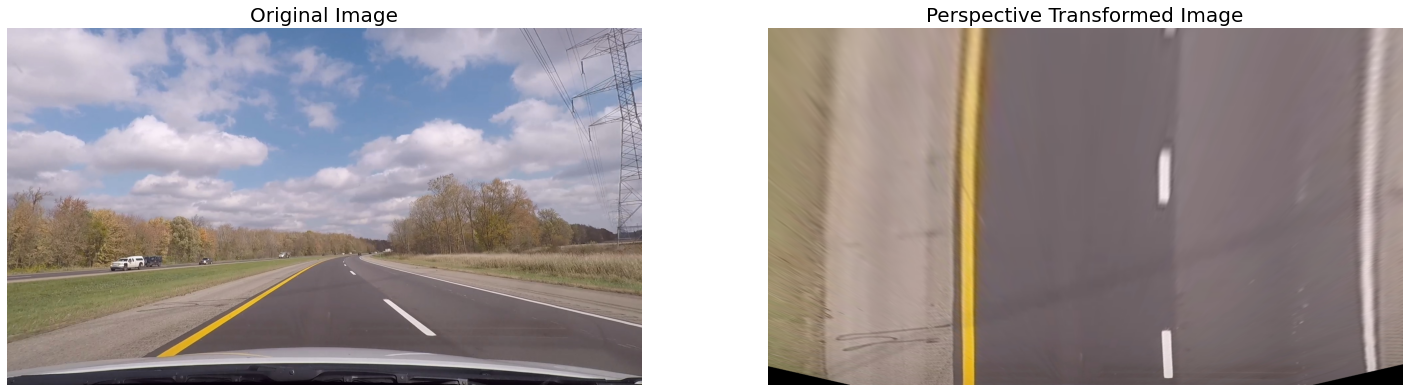

In [4]:
# read in an image
image = mpimg.imread("./test_images/cnn_test/test_cnn_10.jpg")

# undistort the original image using stored values from pickle
undist_original = cv2.undistort(image, mtx, dst, None, mtx)

# apply perspective view on the image
warped_original, M, Minv = perspective_view(undist_original)

# resize the image for neural network input
image_resize = cv2.resize(image, None, fx=0.25, fy=0.25)

print("Following images show the original and perspective transformed images...")
print("Shape of the input image = ", image.shape)
print("Shape of the resized image = ", image_resize.shape)


plt.figure(1)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=20)
ax1.axis('off')
ax2.imshow(warped_original)
ax2.set_title('Perspective Transformed Image', fontsize=20)
ax2.axis('off')
plt.show()

## Load Saved Neural Network Model

Here, we will test the saved neural network model on a single image and display the identified laneline co-efficients. We will use this only to confirm that the model works perfectly and is able to predict the laneline co-efficients.

We will use the laneline co-efficients in the next step to plot onto the image.

![image](./readme_images/color-fit-lines.jpg).

In [5]:
# Load the saved neural network model.
model = keras.models.load_model('model.h5')

# run the model and get the coefficients for the lanelines
predicted_coeffs = model.predict(image_resize[None, :, :, :], batch_size=1)

print("Laneline Coefficients = ", predicted_coeffs)

Laneline Coefficients =  [[  0.        0.      231.57137   0.        0.        0.     ]]
